In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
import warnings # this was used to filter warning in my code
warnings.filterwarnings('ignore')

### 1. Dataset description and Data preparation

The following dataset was collected from National Solar Radiation Database a serially complete collection of hourly and half-hourly values of meteorological data and the three most common measurements of solar radiation: global horizontal, direct normal and diffuse horizontal irradiance. The following data is of a specific place in Rwanda Economic Zone and was collected for the periodn two years from 2018 t0 2019.

##### Importing the dataset

In [2]:
df1=pd.read_csv("1637048_-1.99_29.98_2018.csv",skiprows=2)
df2=pd.read_csv("1637048_-1.99_29.98_2019.csv",skiprows=2)

In [3]:
len(df1)

17520

In [4]:
len(df2)

17520

In [5]:
df1['Date'] = pd.to_datetime(df1[['Year', 'Month', 'Day', 'Hour', 'Minute']]) 
df2['Date'] = pd.to_datetime(df2[['Year', 'Month', 'Day', 'Hour', 'Minute']])

##### Merging Both dataset

In [6]:
# Merging Both datasets
df = pd.concat([df1, df2], axis=0)


In [7]:
df.head()

,Year,Month,Day,Hour,Minute,DHI,GHI,Solar Zenith Angle,DNI,Surface Albedo,Temperature,Clearsky GHI,Clearsky DHI,Clearsky DNI,Ozone,Date
0,2018,1,1,0,0,0,0,154.95,0,0.18,16.4,0,0,0,0.255,2018-01-01 00:00:00
1,2018,1,1,0,30,0,0,154.13,0,0.18,16.3,0,0,0,0.256,2018-01-01 00:30:00
2,2018,1,1,1,0,0,0,151.41,0,0.18,16.2,0,0,0,0.256,2018-01-01 01:00:00
3,2018,1,1,1,30,0,0,147.25,0,0.18,16.2,0,0,0,0.256,2018-01-01 01:30:00
4,2018,1,1,2,0,0,0,142.16,0,0.19,16.4,0,0,0,0.238,2018-01-01 02:00:00


In [8]:
len(df2)

17520

In [9]:
# Checking the missing values
df.isnull().sum()

Year                  0
Month                 0
Day                   0
Hour                  0
Minute                0
DHI                   0
GHI                   0
Solar Zenith Angle    0
DNI                   0
Surface Albedo        0
Temperature           0
Clearsky GHI          0
Clearsky DHI          0
Clearsky DNI          0
Ozone                 0
Date                  0
dtype: int64

In [10]:
df.columns

Index(['Year', 'Month', 'Day', 'Hour', 'Minute', 'DHI', 'GHI',
       'Solar Zenith Angle', 'DNI', 'Surface Albedo', 'Temperature',
       'Clearsky GHI', 'Clearsky DHI', 'Clearsky DNI', 'Ozone', 'Date'],
      dtype='object')

In [11]:
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day', 'Hour', 'Minute']])
df=df[['Date', 'DHI', 'GHI','Solar Zenith Angle', 'DNI', 'Surface Albedo', 'Temperature','Clearsky GHI', 'Clearsky DHI', 'Clearsky DNI', 'Ozone']]

In [12]:
df.head()

,Date,DHI,GHI,Solar Zenith Angle,DNI,Surface Albedo,Temperature,Clearsky GHI,Clearsky DHI,Clearsky DNI,Ozone
0,2018-01-01 00:00:00,0,0,154.95,0,0.18,16.4,0,0,0,0.255
1,2018-01-01 00:30:00,0,0,154.13,0,0.18,16.3,0,0,0,0.256
2,2018-01-01 01:00:00,0,0,151.41,0,0.18,16.2,0,0,0,0.256
3,2018-01-01 01:30:00,0,0,147.25,0,0.18,16.2,0,0,0,0.256
4,2018-01-01 02:00:00,0,0,142.16,0,0.19,16.4,0,0,0,0.238


### Descriptive Analytics

In [13]:
df.describe()

,DHI,GHI,Solar Zenith Angle,DNI,Surface Albedo,Temperature,Clearsky GHI,Clearsky DHI,Clearsky DNI,Ozone
count,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000,35040.000000
mean,101.442780,196.009960,90.004428,134.261130,0.179781,20.344946,300.469007,57.696661,346.335388,0.254663
std,152.989278,289.907046,47.512891,258.007251,0.009003,3.857940,379.937893,71.546686,387.177600,0.009368
min,0.000000,0.000000,2.200000,0.000000,0.150000,9.600000,0.000000,0.000000,0.000000,0.229000
25%,0.000000,0.000000,47.660000,0.000000,0.180000,17.300000,0.000000,0.000000,0.000000,0.247000
50%,0.000000,0.000000,89.890000,0.000000,0.180000,19.600000,0.000000,0.000000,0.000000,0.256000
75%,143.000000,356.000000,132.772500,140.000000,0.180000,23.500000,659.250000,108.000000,771.000000,0.261000
max,557.000000,1089.000000,178.640000,1008.000000,0.210000,31.100000,1089.000000,466.000000,1008.000000,0.281000


# Clearsky GHI

## 2018

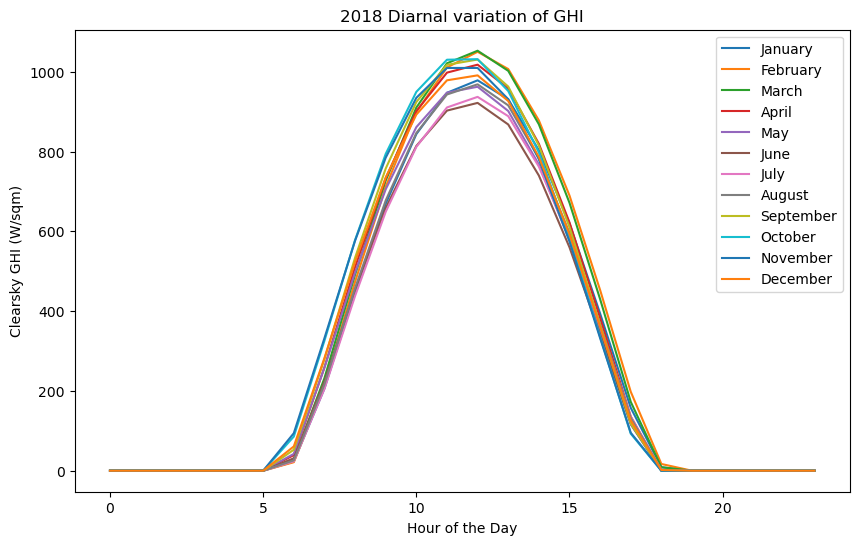

In [14]:
monthly_avg = df1.groupby(['Month', 'Hour'])['Clearsky GHI'].mean().unstack(level=0)
monthly_avg.plot(figsize=(10, 6))
month_names = [calendar.month_name[i] for i in monthly_avg.columns]
plt.legend(month_names)
plt.xlabel('Hour of the Day')
plt.ylabel('Clearsky GHI (W/sqm)')
plt.title('2018 Diarnal variation of GHI')
plt.show()

In [15]:
monthly_avg = df1.groupby(['Month', 'Hour'])['Clearsky GHI'].mean().unstack(level=0)
max_months = monthly_avg.max()
max_ghi_df = pd.DataFrame({'Month': max_months.index, '2018 Insolation': max_months.values})
max_ghi_df['Month'] = max_ghi_df['Month'].map(lambda x: calendar.month_name[x])
max_ghi_df.set_index('Month',inplace=True)


In [16]:
max_ghi_df

,2018 Insolation
Month,
January,978.370968
February,1049.875000
March,1052.564516
April,1017.600000
May,962.258065
June,921.816667
July,936.919355
August,968.354839
September,1030.550000


## 2019

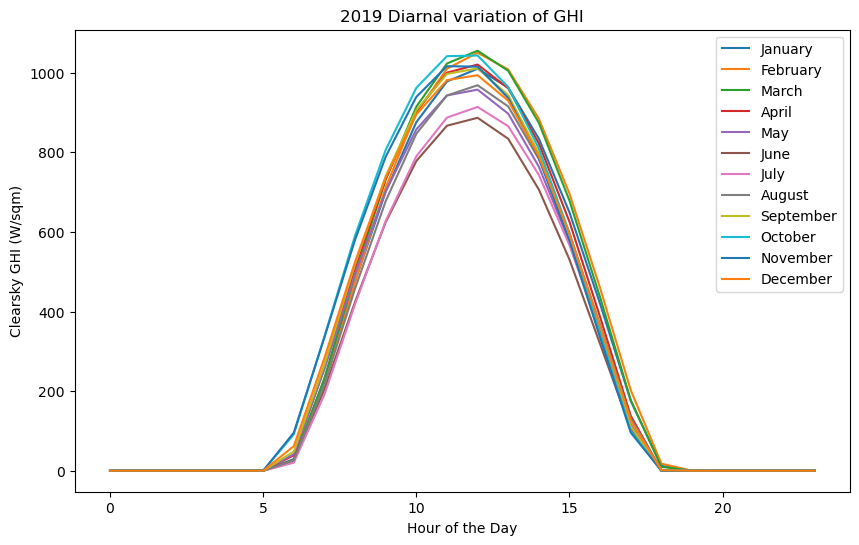

<Figure size 640x480 with 0 Axes>

In [17]:
monthly_avg = df2.groupby(['Month', 'Hour'])['Clearsky GHI'].mean().unstack(level=0)
monthly_avg.plot(figsize=(10, 6))
month_names = [calendar.month_name[i] for i in monthly_avg.columns]
plt.legend(month_names)
plt.xlabel('Hour of the Day')
plt.ylabel('Clearsky GHI (W/sqm)')
plt.title('2019 Diarnal variation of GHI')

plt.show()
plt.savefig("2019 Diarnal variation of GHI.png")

In [18]:
monthly_avg = df2.groupby(['Month', 'Hour'])['Clearsky GHI'].mean().unstack(level=0)
max_months = monthly_avg.max()
max_ghi_df = pd.DataFrame({'Month': max_months.index, '2019 Insolation': max_months.values})
max_ghi_df['Month'] = max_ghi_df['Month'].map(lambda x: calendar.month_name[x])
max_ghi_df.set_index('Month',inplace=True)

In [19]:
max_ghi_df

,2019 Insolation
Month,
January,1010.064516
February,1050.107143
March,1055.322581
April,1020.550000
May,957.580645
June,886.783333
July,914.016129
August,968.645161
September,1011.000000


# Clearsky DHI

## 2018

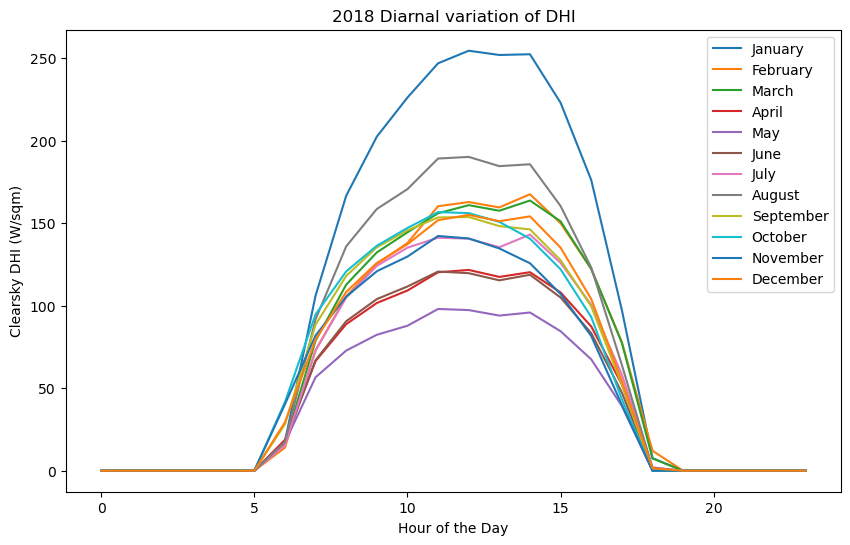

In [20]:
monthly_avg = df1.groupby(['Month', 'Hour'])['Clearsky DHI'].mean().unstack(level=0)
monthly_avg.plot(figsize=(10, 6))
month_names = [calendar.month_name[i] for i in monthly_avg.columns]
plt.legend(month_names)
plt.xlabel('Hour of the Day')
plt.ylabel('Clearsky DHI (W/sqm)')
plt.title('2018 Diarnal variation of DHI')
plt.show()

In [21]:
monthly_avg = df1.groupby(['Month', 'Hour'])['Clearsky DHI'].mean().unstack(level=0)
max_months = monthly_avg.max()
max_ghi_df = pd.DataFrame({'Month': max_months.index, '2018 Insolation': max_months.values})
max_ghi_df['Month'] = max_ghi_df['Month'].map(lambda x: calendar.month_name[x])
max_ghi_df.set_index('Month',inplace=True)

In [22]:
max_ghi_df

,2018 Insolation
Month,
January,254.532258
February,167.571429
March,163.741935
April,121.683333
May,98.016129
June,120.700000
July,143.096774
August,190.193548
September,153.783333


## 2019

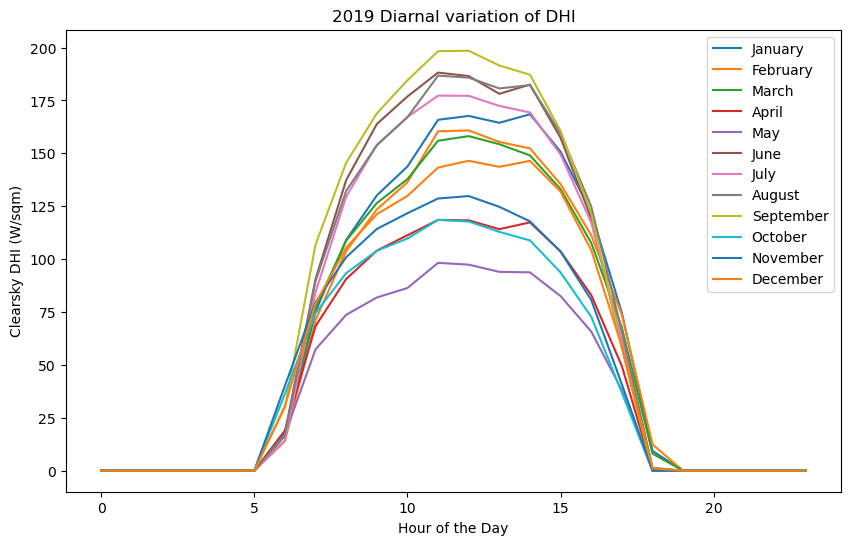

<Figure size 640x480 with 0 Axes>

In [23]:
monthly_avg = df2.groupby(['Month', 'Hour'])['Clearsky DHI'].mean().unstack(level=0)
monthly_avg.plot(figsize=(10, 6))
month_names = [calendar.month_name[i] for i in monthly_avg.columns]
plt.legend(month_names)
plt.xlabel('Hour of the Day')
plt.ylabel('Clearsky DHI (W/sqm)')
plt.title('2019 Diarnal variation of DHI')
plt.show()
plt.savefig("2019 Diarnal variation of DHI.png")

In [24]:
monthly_avg = df2.groupby(['Month', 'Hour'])['Clearsky DHI'].mean().unstack(level=0)
max_months = monthly_avg.max()
max_ghi_df = pd.DataFrame({'Month': max_months.index, '2019 Insolation': max_months.values})
max_ghi_df['Month'] = max_ghi_df['Month'].map(lambda x: calendar.month_name[x])
max_ghi_df.set_index('Month',inplace=True)


In [25]:
max_ghi_df

,2019 Insolation
Month,
January,168.483871
February,160.857143
March,158.161290
April,118.550000
May,98.258065
June,188.183333
July,177.290323
August,186.741935
September,198.516667


# Clearsky DNI

## 2018

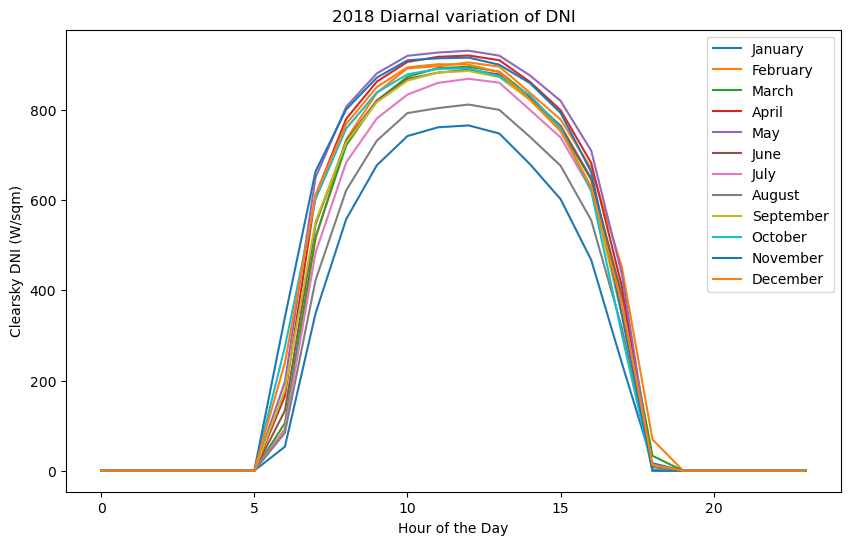

In [26]:
monthly_avg = df1.groupby(['Month', 'Hour'])['Clearsky DNI'].mean().unstack(level=0)
monthly_avg.plot(figsize=(10, 6))
month_names = [calendar.month_name[i] for i in monthly_avg.columns]
plt.legend(month_names)
plt.xlabel('Hour of the Day')
plt.ylabel('Clearsky DNI (W/sqm)')
plt.title('2018 Diarnal variation of DNI')
plt.show()

In [27]:
monthly_avg = df1.groupby(['Month', 'Hour'])['Clearsky DNI'].mean().unstack(level=0)
max_months = monthly_avg.max()
max_ghi_df = pd.DataFrame({'Month': max_months.index, '2018 Insolation': max_months.values})
max_ghi_df['Month'] = max_ghi_df['Month'].map(lambda x: calendar.month_name[x])
max_ghi_df.set_index('Month',inplace=True)

In [28]:
max_ghi_df

,2018 Insolation
Month,
January,765.645161
February,905.392857
March,895.645161
April,920.716667
May,931.322581
June,889.166667
July,869.145161
August,811.967742
September,886.366667


## 2019

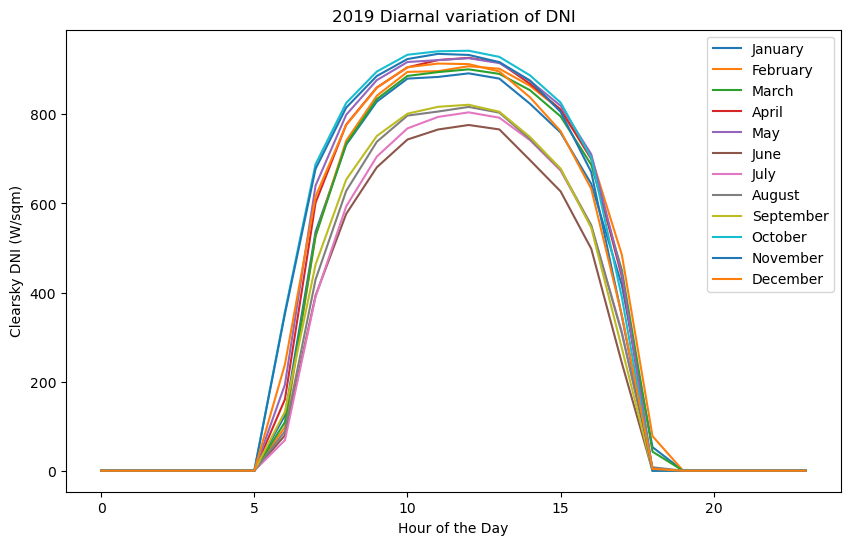

<Figure size 640x480 with 0 Axes>

In [29]:
monthly_avg = df2.groupby(['Month', 'Hour'])['Clearsky DNI'].mean().unstack(level=0)
monthly_avg.plot(figsize=(10, 6))
month_names = [calendar.month_name[i] for i in monthly_avg.columns]
plt.legend(month_names)
plt.xlabel('Hour of the Day')
plt.ylabel('Clearsky DNI (W/sqm)')
plt.title('2019 Diarnal variation of DNI')
plt.show()
plt.savefig("2019 Diarnal variation of DNI.png")

In [30]:
monthly_avg = df2.groupby(['Month', 'Hour'])['Clearsky DNI'].mean().unstack(level=0)
max_months = monthly_avg.max()
max_ghi_df = pd.DataFrame({'Month': max_months.index, '2019 Insolation': max_months.values})
max_ghi_df['Month'] = max_ghi_df['Month'].map(lambda x: calendar.month_name[x])
max_ghi_df.set_index('Month',inplace=True)

In [31]:
max_ghi_df

,2019 Insolation
Month,
January,892.064516
February,908.053571
March,901.048387
April,926.866667
May,926.048387
June,776.150000
July,804.516129
August,816.693548
September,821.566667
